# Example dataset notebook 
## Gonzalez & Vöröslakos et al 2026
The dataset contains: 
1) Neuropixels 2.0 recordings across CA3, CA1, and RSC. 
2) Behavioral data (novel linear maze, Pre/Post Sleep)

## 1. Importing Necessary Libraries
This first cell imports the essential Python libraries required for the analysis. We import os for interacting with the file system, numpy and pandas for efficient data manipulation and analysis, pynwb for reading the Neurodata Without Borders (NWB) file format, and matplotlib for creating visualizations.

In [1]:
import os
import numpy as np
import pandas as pd
from pynwb import NWBHDF5IO
from matplotlib import pyplot as plt

## 2. Loading the NWB Data File
Here, we specify the name of the NWB file we want to analyze. We then set the program's current working directory to the location of this file on the local system. Finally, we use the NWBHDF5IO tool to open the file in read-only mode ('r') and load its contents into an nwbfile object, which will serve as our primary entry point to the dataset.

In [2]:
# Change the current working directory to the folder containing the NWB file.
# Note: This path is specific to the original user's machine and may need to be updated.

file_name = 'sub-M02_ses-20240313T100000_behavior+ecephys.nwb'
os.chdir(r'C:\Users\GONZAJ81\Desktop\DANDI set\001695\sub-M02')

from pynwb import NWBHDF5IO
io = NWBHDF5IO(file_name, 'r')
nwbfile = io.read()


## 3. Visualizing Neuronal Spiking Activity Across Brain Regions
This section extracts spike data for individual neurons (units) from the NWB file. It first accesses the units table, which contains the results of spike sorting. From this table, it pulls spike times and the corresponding brain region for each unit (CA1, CA3, and RSC). It then generates a raster plot, which is a standard visualization in neuroscience that shows the timing of spikes for multiple neurons over a defined window of time. Each neuron is represented by a horizontal line, and each spike is a vertical tick, with colors indicating the brain region of origin.

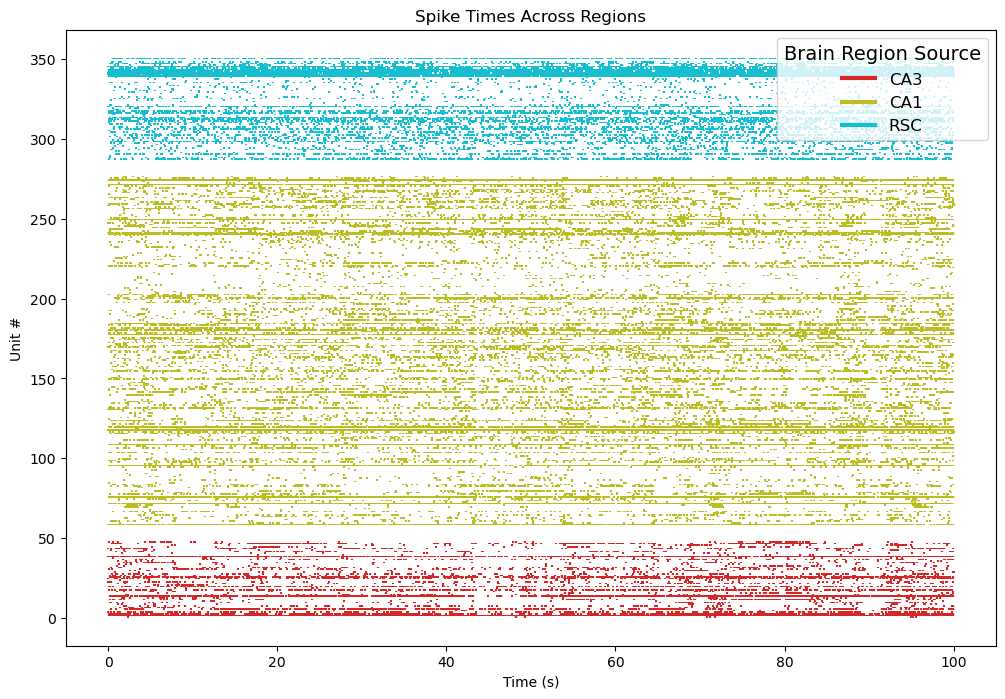

In [3]:
# Access the 'units' table from the NWB file, which contains spike data and metadata for each neuron.
units_table = nwbfile.units
# Extract the spike times for all recorded units.
spike_times = units_table['spike_times']
# Extract the classified cell type for each unit and convert it to a numpy array.
cell_type = np.array(units_table['cell_type'])
# Extract the brain region (anatomical area) for each unit and convert it to a numpy array.
cell_area = np.array(units_table['cell_area'])

# Filter the spike times to isolate only those neurons located in each brain region.
spike_times_ca1 = spike_times[cell_area == 'CA1']
spike_times_ca3 = spike_times[cell_area == 'CA3']
spike_times_rsc = spike_times[cell_area == 'RSC']
    

plt.figure(figsize = (12,8))

# Define the time window (from 0 to 100 seconds) for which to display spikes.
# Loop through each neuron (unit) identified in each CA3 region.
# Select only the spikes that fall within the specified time window.

time_window_plot = [0,100]

plot_count = 0

for spikes in spike_times_ca3:
    spikes_plot = spikes[(spikes>time_window_plot[0])*(spikes<time_window_plot[1])]
    plt.vlines(spikes_plot,plot_count,plot_count+1, color = 'tab:red')
    plot_count = plot_count+1

plot_count = plot_count+10

for spikes in spike_times_ca1:
    spikes_plot = spikes[(spikes>time_window_plot[0])*(spikes<time_window_plot[1])]
    plt.vlines(spikes_plot,plot_count,plot_count+1, color = 'tab:olive')
    plot_count = plot_count+1

plot_count = plot_count+10

for spikes in spike_times_rsc:
    spikes_plot = spikes[(spikes>time_window_plot[0])*(spikes<time_window_plot[1])]
    plt.vlines(spikes_plot,plot_count,plot_count+1, color = 'tab:cyan')
    plot_count = plot_count+1


import matplotlib.lines as mlines 
# Create a proxy artist (a red line) to represent neurons in the legend.
ca3_handle = mlines.Line2D([], [], color='tab:red', linewidth=3, label='CA3')
ca1_handle = mlines.Line2D([], [], color='tab:olive', linewidth=3, label='CA1')
rsc_handle = mlines.Line2D([], [], color='tab:cyan', linewidth=3, label='RSC')

plt.legend(handles=[ca3_handle, ca1_handle, rsc_handle], 
           loc='upper right', 
           title='Brain Region Source', 
           fontsize=12, 
           title_fontsize=14)

plt.title('Spike Times Across Regions')
plt.ylabel('Unit #')
plt.xlabel('Time (s)')
plt.show()

## 4. Analyzing an Individual Neuron's Properties
This cell demonstrates how to access detailed electrophysiological features for each neuron. 

cell_types                 Pyramidal Cell
cell_area                             CA1
firing_rate                      0.650905
ab_ratio                        -0.685498
burstIndex_Mizuseki2012          0.047435
cv2                              1.160722
maxWaveformCh                         379
troughToPeak                     0.483333
acg_tau_decay                   11.818075
acg_tau_rise                     2.049958
thetaModulationIndex            -0.048476
x_position_probe                    309.0
y_position_probe                   1395.0
Name: 100, dtype: object


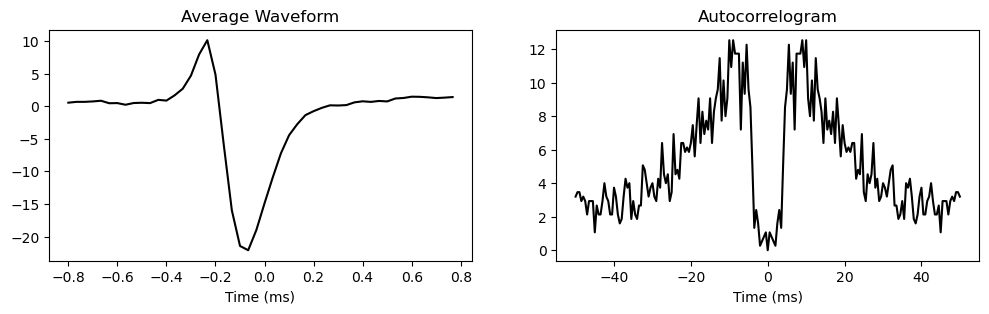

In [4]:
# Extract various pre-computed features for each unit and store them as numpy arrays.
waveforms = units_table['waveforms']
acg = units_table['acg']
cell_types = np.array(units_table['cell_type'])
cell_area = np.array(units_table['cell_area'])
firing_rate = np.array(units_table['firing_rate'])
ab_ratio = np.array(units_table['ab_ratio'])
cv2 = np.array(units_table['cv2'])
burstIndex_Mizuseki2012 = np.array(units_table['burstIndex_Mizuseki2012'])
maxWaveformCh = np.array(units_table['maxWaveformCh'])
troughToPeak = np.array(units_table['troughToPeak'])
acg_tau_decay = np.array(units_table['acg_tau_decay'])
acg_tau_rise = np.array(units_table['acg_tau_rise'])
thetaModulationIndex = np.array(units_table['thetaModulationIndex'])
x_position_probe = np.array(units_table['x_position_probe'])
y_position_probe = np.array(units_table['y_position_probe'])

# Create a pandas DataFrame to hold all the extracted features in a tabular format for easy viewing and analysis.
units_df = pd.DataFrame({
    'cell_types': cell_types,
    'cell_area': cell_area,
    'firing_rate': firing_rate,
    'ab_ratio': ab_ratio,
    'burstIndex_Mizuseki2012': burstIndex_Mizuseki2012,
    'cv2': cv2,
    'maxWaveformCh': maxWaveformCh,
    'troughToPeak': troughToPeak,
    'acg_tau_decay': acg_tau_decay,
    'acg_tau_rise': acg_tau_rise,
    'thetaModulationIndex': thetaModulationIndex,
    'x_position_probe': x_position_probe,
    'y_position_probe': y_position_probe,
}) 

plt.figure(figsize = (12,3))

# Specify the index of the unit to be plotted (unit 100).
unit_2_plot = 100

plt.subplot(121)
plt.plot(np.linspace(-0.8,0.7666666,48),waveforms[unit_2_plot], color = 'black')
plt.title('Average Waveform')
plt.xlabel('Time (ms)')

plt.subplot(122)
plt.plot(np.linspace(-50,50,201),acg[unit_2_plot], color = 'black')
plt.title('Autocorrelogram')
plt.xlabel('Time (ms)')

print(units_df.iloc[unit_2_plot,:])


## 5. Visualizing Sleep States (Hypnogram)
This cell accesses and visualizes the animal's sleep states over time. It extracts the start and stop times for each classified state (Wake, NREM, REM) from the intervals table in the NWB file. It then constructs a hypnogram, which is a graphical representation of these states, allowing for a quick overview of the animal's sleep architecture throughout the recording session.

([<matplotlib.axis.YTick at 0x1f6fe6009e0>,
 [Text(0, 0.5, 'Wake'), Text(0, 1.5, 'NREM'), Text(0, 2.5, 'REM')])

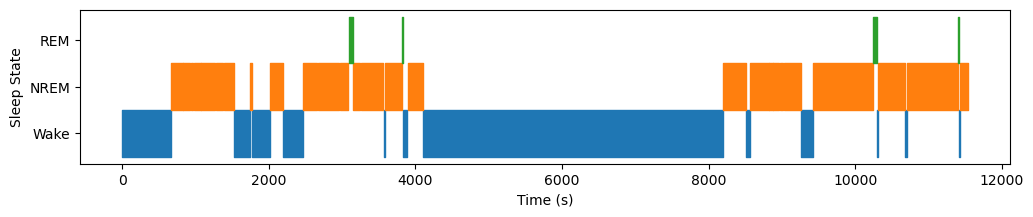

In [5]:
# Access the 'SleepStates' interval table from the NWB file.
sleep_states = nwbfile.intervals['SleepStates']

# Extract the array of state labels ('WAKE', 'NREM', 'REM') and times into numpy arrays.
states = np.array(sleep_states['state'])
start_time = np.array(sleep_states['start_time'])
stop_time = np.array(sleep_states['stop_time'])
nrem_index = states == 'NREM'
rem_index = states == 'REM'
wake_index = states == 'WAKE'

start_time_nrem = start_time[nrem_index]
stop_time_nrem = stop_time[nrem_index]

start_time_rem = start_time[rem_index]
stop_time_rem = stop_time[rem_index]

start_time_wake = start_time[wake_index]
stop_time_wake = stop_time[wake_index]

plt.figure(figsize = (12,2))

# Loop through each state epoch using its start and stop times and plot it.
for start,stop in zip(start_time_wake,stop_time_wake):
    plt.fill_between([start,stop],[0,0],[1,1], color = 'tab:blue')
    
for start,stop in zip(start_time_nrem,stop_time_nrem):
    plt.fill_between([start,stop],[1,1],[2,2], color = 'tab:orange')
    
for start,stop in zip(start_time_rem,stop_time_rem):
    plt.fill_between([start,stop],[2,2],[3,3], color = 'tab:green')

plt.ylabel('Sleep State')
plt.xlabel('Time (s)')
plt.yticks([0.5,1.5,2.5],labels = ['Wake', 'NREM', 'REM'])

## 6. Visualizing Sharp-Wave Ripple (SWR) Events
Sharp-wave ripples (SWRs) are brief, high-frequency oscillations that are critical for memory consolidation. This cell extracts the precise start and stop times of detected SWR events from the same intervals table used for sleep states. It then plots these events as black vertical bars to show their timing across the recording session.

([], [])

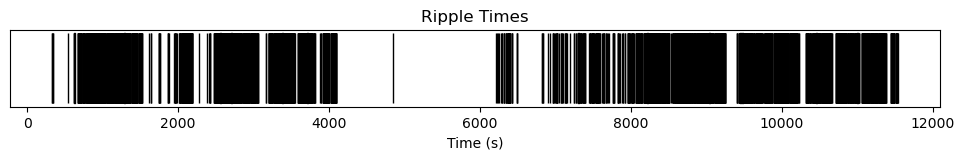

In [6]:
ripples_index = states == 'Ripple'
start_time_ripples = start_time[ripples_index]
stop_time_ripples = stop_time[ripples_index]

plt.figure(figsize = (12,1))

for start,stop in zip(start_time_ripples,stop_time_ripples):
    plt.fill_between([start,stop],[0,0],[1,1], color = 'black')
    
plt.title('Ripple Times')
plt.xlabel('Time (s)')
plt.yticks([])

## 7. Accessing the LFP signal 
This cell extracts the LFP used for detecting SWR. 

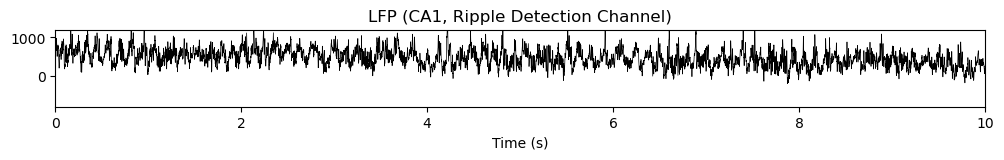

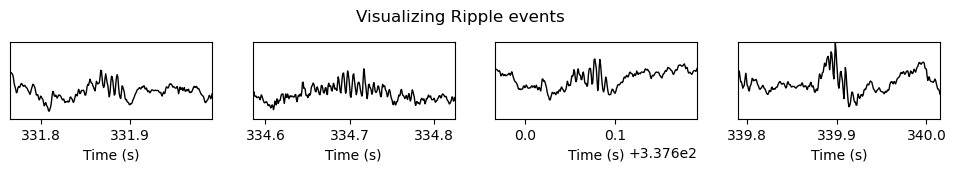

In [7]:
ecephys_module = nwbfile.processing['ecephys']
lfp_container = ecephys_module.get('LFP')

# We named the LFP ElectricalSeries 'Best_Ripple_LFP'
lfp_series = lfp_container.get_electrical_series('Best_Ripple_channel_LFP_CA1')

lfp_traces = lfp_series.data[:] # Use [:] to load the data into memory
                
# B. The Timestamps (Time in seconds)
srate_lfp = lfp_series.rate
starting_time = lfp_series.starting_time
lfp_times = np.arange(starting_time,lfp_traces.shape[0]/srate_lfp,1/srate_lfp)

plt.figure(figsize = (12,1))
plt.plot(lfp_times,lfp_traces, linewidth = 0.5, color = 'black')
plt.xlim([0,10])
plt.title('LFP (CA1, Ripple Detection Channel)')
plt.xlabel('Time (s)')
plt.ylim([-800,1200])
plt.show()

plt.figure(figsize = (12,1))
plt.suptitle('Visualizing Ripple events', y = 1.2)

plt.subplot(141)
plt.plot(lfp_times,lfp_traces, linewidth = 1, color = 'black')
plt.xlim([start_time_ripples[0]-0.1,stop_time_ripples[0]+0.1])
plt.xlabel('Time (s)')
plt.ylim([-800,1200])
plt.yticks([])

plt.subplot(142)
plt.plot(lfp_times,lfp_traces, linewidth = 1, color = 'black')
plt.xlim([start_time_ripples[1]-0.1,stop_time_ripples[1]+0.1])
plt.xlabel('Time (s)')
plt.ylim([-800,1200])
plt.yticks([])

plt.subplot(143)
plt.plot(lfp_times,lfp_traces, linewidth = 1, color = 'black')
plt.xlim([start_time_ripples[2]-0.1,stop_time_ripples[2]+0.1])
plt.xlabel('Time (s)')
plt.ylim([-800,1200])
plt.yticks([])

plt.subplot(144)
plt.plot(lfp_times,lfp_traces, linewidth = 1, color = 'black')
plt.xlim([start_time_ripples[3]-0.1,stop_time_ripples[3]+0.1])
plt.xlabel('Time (s)')
plt.ylim([-800,1200])
plt.yticks([])

plt.show()

## 8. Accessing the Behavioral Data Module
The NWB format organizes processed data into "processing modules." This cell demonstrates how to access the behavior module, which typically contains data related to the animal's actions, such as position tracking and speed. Displaying the module object provides a summary of the data interfaces it contains (in this case, AnimalPosition and Speed). This cell then drills down into the behavior module to extract the numerical data. It accesses the AnimalPosition and Speed timeseries objects and pulls out the position coordinates, speed values, and their corresponding timestamps, storing each in a separate numpy array for easy use in plotting and analysis.

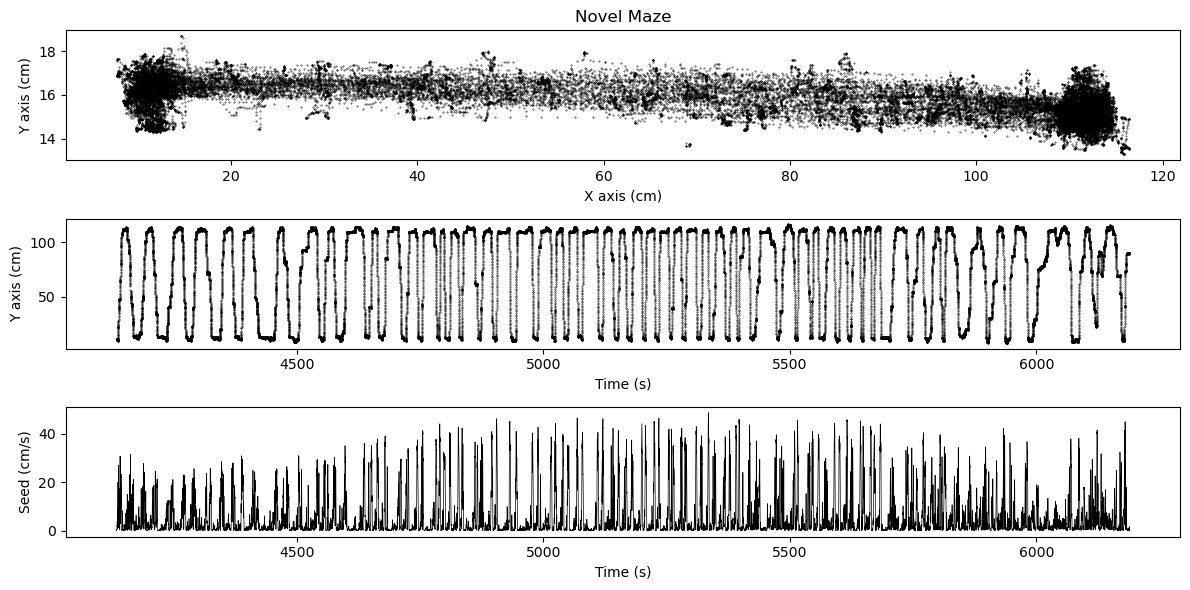

In [8]:
behavior_module = nwbfile.processing['behavior']

# Extract the 2D position data (x, y coordinates) from the 'Position' spatial series and convert to a numpy array.
position = np.array(behavior_module['AnimalPosition']['Position'].data)

# Extract the speed data from the 'Speed' timeseries and convert to a numpy array.
speed = np.array(behavior_module['Speed'].data)

# Extract the timestamps corresponding to each position/speed data point.
timestamps = np.array(behavior_module['AnimalPosition']['Position'].timestamps)

plt.figure(figsize = (12,6))

plt.subplot(311)
plt.scatter(position[:,0],position[:,1], s = 0.1, color = 'black')
plt.ylabel('Y axis (cm)')
plt.xlabel('X axis (cm)')
plt.title('Novel Maze')

plt.subplot(312)
plt.scatter(timestamps,position[:,0], s = 0.1, color = 'black')
plt.ylabel('Y axis (cm)')
plt.xlabel('Time (s)')

plt.subplot(313)
plt.plot(timestamps,speed, color = 'black', linewidth = 0.5)
plt.ylabel('Seed (cm/s)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()